In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *
from control.matlab import *
import control as ct

plt.style.use('default')

In [17]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [18]:
df_e_ed_n11 = pd.read_csv('../data/e_ed_n11_d.csv'  ,header=None)
df_data_n11 = pd.read_csv('../data/entrada_saida_nsenos_n11_111v.csv', header=None)

In [19]:
e_ed_n11 = np.array(df_e_ed_n11[0],ndmin=2).T
u_ar_n11 = np.array(df_data_n11[0],ndmin=2).T
y_ar_n11 = np.array(df_data_n11[1],ndmin=2).T

In [20]:
nz = number_of_zeros(y_ar_n11)
u_ar_n11 = u_ar_n11[nz-1:]

In [21]:
print(u_ar_n11.size == e_ed_n11.size)

True


In [22]:
best_order_ed_n11 = find_best_ARX_order(u_ar_n11 ,e_ed_n11,10,0.03,True)

ARX 1ª ordem V = 1714.9478821161263
ARX 2ª ordem V = 1637.9810620561507
ARX 3ª ordem V = 1590.2390981196586
2 é a melhor ordem


In [23]:
Y_e_ed, phi_e_ed = build_Y_phi_ARX(u_ar_n11,e_ed_n11,best_order_ed_n11)

theta_hat_e_ed = calcular_theta_min_quad(Y_e_ed,phi_e_ed)

e_hat_ed = estimate_output(y=e_ed_n11,u=u_ar_n11,theta=theta_hat_e_ed,ord=best_order_ed_n11)

In [24]:
df = pd.DataFrame(theta_hat_e_ed)
df.to_csv('../data/theta_hat_e_ed_n11_111v.csv',header=False,index=False)

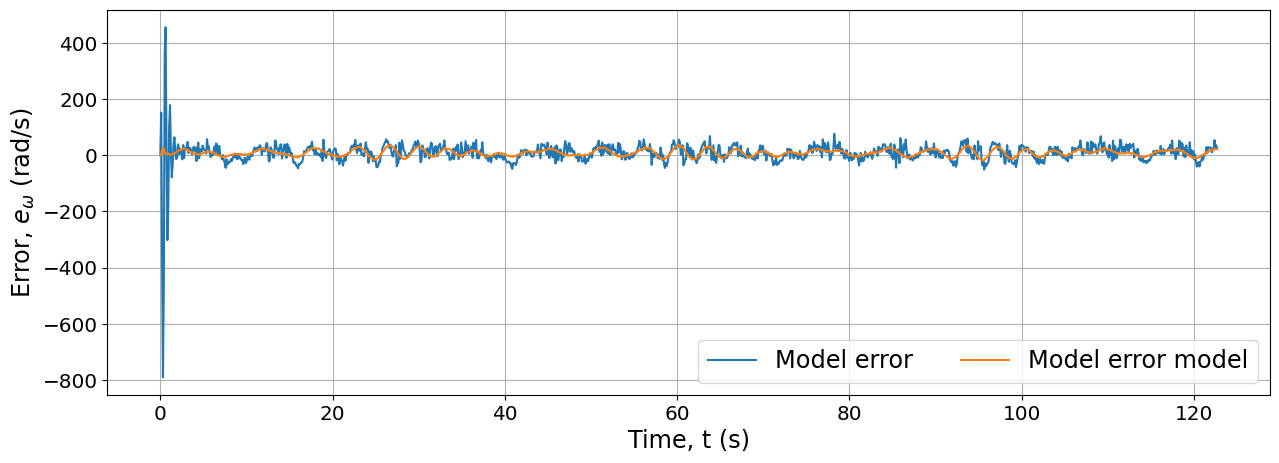

In [25]:
t = np.arange(0,e_ed_n11.size)*0.1024
plt.figure(1,figsize=[15,5])
plt.grid(True)

#plt.ylim([-150,1600])
#plt.xlim([-1,121])
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')

plt.xlabel('Time, t (s)',fontsize='xx-large')
plt.ylabel('Error, $e_{\omega}$ (rad/s)',fontsize='xx-large')

plt.plot(t,e_ed_n11,label='Model error')
plt.plot(t,e_hat_ed,label='Model error model')
plt.legend(fontsize='xx-large', ncol=2,loc='lower right')

plt.savefig(fname='../figures/model_error_model.png')

Error Model Frequency Response

In [26]:
Ts = 0.1024
a1, a2, b1, b2 = theta_hat_e_ed[:,0]
num = [b1, b2]
den = [1, a1, a2]
sys_e_ed = ct.tf(num,den,Ts)

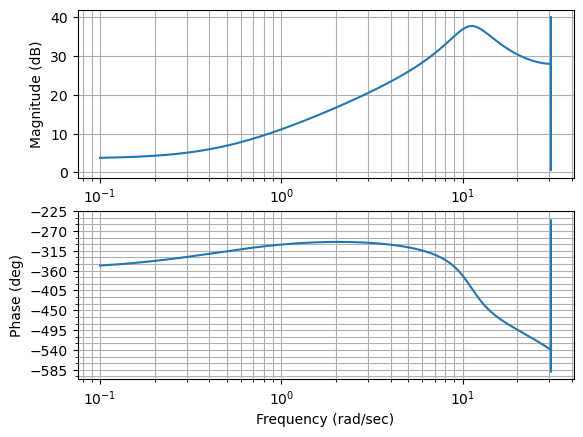

In [27]:
mag_ed, phase_ed, omega_ed = ct.bode(sys_e_ed)